Initializing important libraries for reading, plotting, and calling the data set file 

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('./mydata.csv')  


Seperating blood pressure into two columns for interpretability. Then the data is cleaned and visualized to make sure everything is going right. 

In [3]:
# Checking if 'Blood Pressure' column exists and split it
if 'Blood Pressure' in df.columns:
    # Splitting 'Blood Pressure' into 'systolic_bp' and 'diastolic_bp'
    df[['systolic_bp', 'diastolic_bp']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)
    # Dropping the original 'Blood Pressure' column
    df.drop('Blood Pressure', axis=1, inplace=True)

# Filling missing values in 'Sleep Disorder' with 'No Disorder'
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')

# Creating binary indicator for 'Accountant' in Occupation
df['Is_Accountant'] = (df['Occupation'] == 'Accountant').astype(int)

# Creating binary indicator for 'Normal' in BMI Category
df['Is_Normal_BMI'] = (df['BMI Category'] == 'Normal').astype(int)

# Ensure there are no NaN values left in key columns if necessary
df.fillna({
    'systolic_bp': df['systolic_bp'].median(),
    'diastolic_bp': df['diastolic_bp'].median(),
}, inplace=True)

#Check the structure and cleaned data
print(df.head())
print(df.info())


   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

   Heart Rate  Daily Steps Sleep Disorder  systolic_bp  diastolic_bp  \
0          77         4200    No Disorder        126.0          83.0   
1       

visualizing pair plots between numeric inputs, box plots for numeric inputs against output, and histograms for categorical inputs against output. 

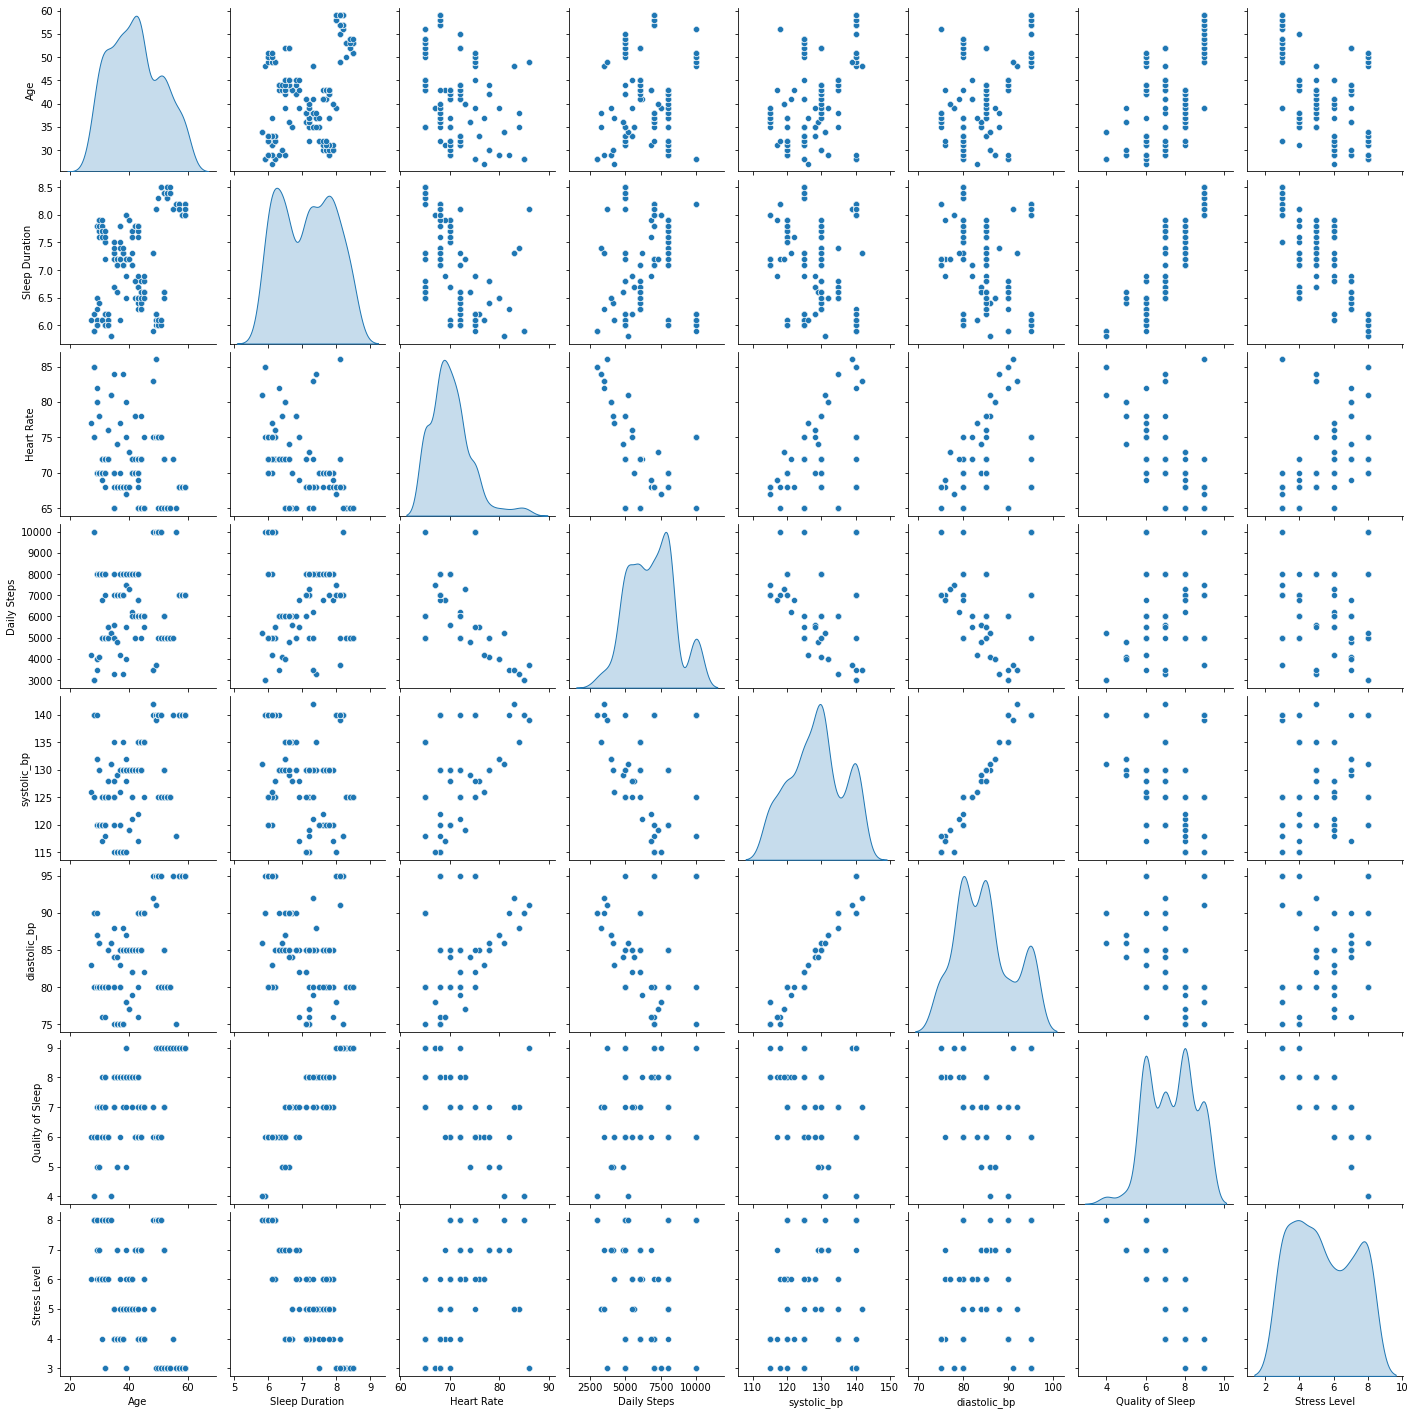

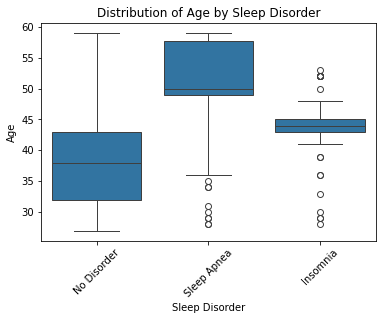

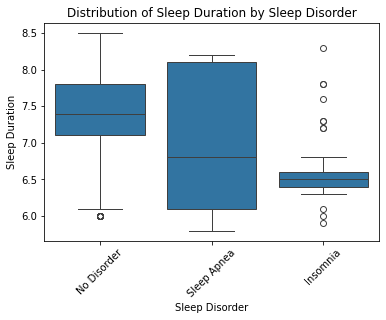

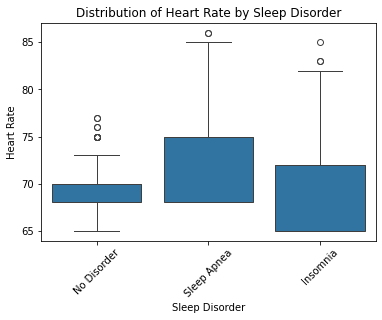

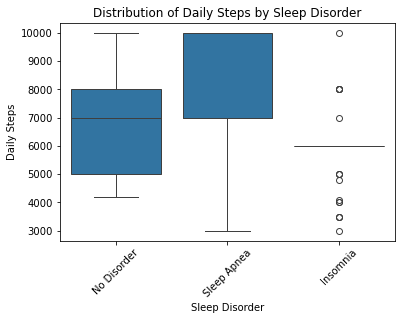

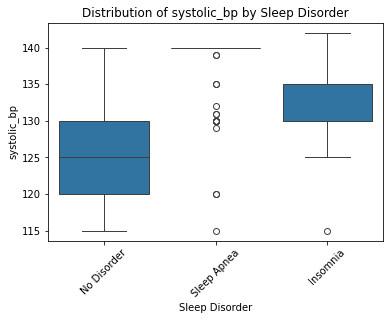

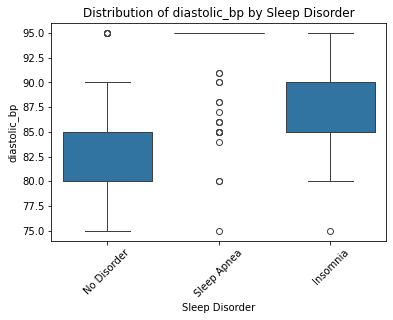

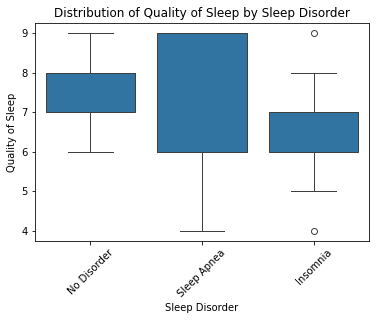

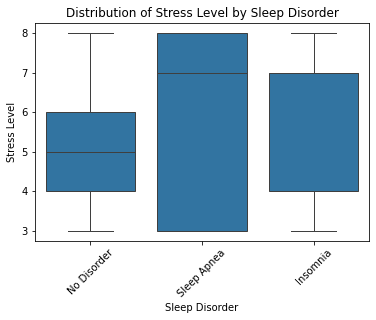

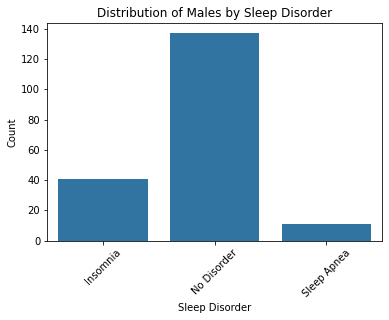

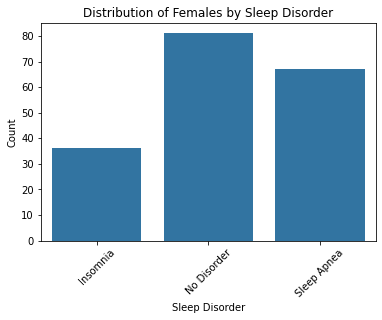

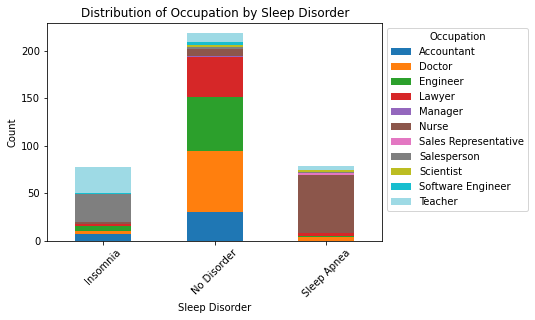

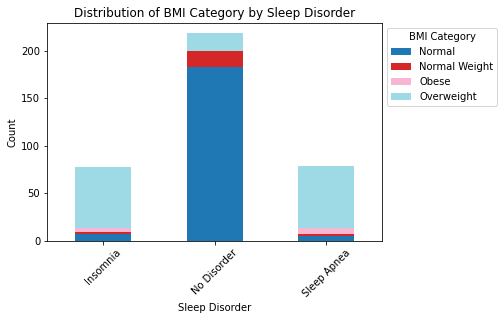

In [4]:

# Removing 'Nonexykghk' from 'Sleep Disorder' column
df = df[df['Sleep Disorder'] != 'Nonexykghk']

# Visualizing continuous variables with a pair plot
sns.pairplot(df[['Age', 'Sleep Duration', 'Heart Rate', 'Daily Steps', 'systolic_bp', 'diastolic_bp','Quality of Sleep','Stress Level']], diag_kind='kde')
plt.show()

# Visualizing the distribution of continuous variables across different categories of 'Sleep Disorder'
for feature in ['Age', 'Sleep Duration', 'Heart Rate', 'Daily Steps', 'systolic_bp', 'diastolic_bp','Quality of Sleep','Stress Level']:
    sns.boxplot(x='Sleep Disorder', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Sleep Disorder')
    plt.xticks(rotation=45)
    plt.show()

# Visualizing distribution of 'Gender_Male' and 'Gender_Female' by Sleep Disorder
if 'Gender' in df.columns:
    df['Gender_Male'] = (df['Gender'] == 'Male').astype(int)
    df['Gender_Female'] = (df['Gender'] == 'Female').astype(int)
grouped_male = df.groupby('Sleep Disorder')['Gender_Male'].sum().reset_index()
grouped_female = df.groupby('Sleep Disorder')['Gender_Female'].sum().reset_index()

sns.barplot(x='Sleep Disorder', y='Gender_Male', data=grouped_male)
plt.title('Distribution of Males by Sleep Disorder')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

sns.barplot(x='Sleep Disorder', y='Gender_Female', data=grouped_female)
plt.title('Distribution of Females by Sleep Disorder')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualizing all categories within 'Occupation' and 'BMI Category'
for feature in ['Occupation', 'BMI Category']:
    grouped = df.groupby(['Sleep Disorder', feature]).size().unstack(fill_value=0)
    ax = grouped.plot(kind='bar', stacked=True, colormap='tab20')  
    plt.title(f'Distribution of {feature} by Sleep Disorder')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title=feature, loc='upper left', bbox_to_anchor=(1,1)) 
    plt.show()


Initializing all important libraries for RFC ,DT and FCNN.

In [5]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping


2024-05-07 03:12:33.334312: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-07 03:12:33.335718: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-07 03:12:33.393707: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-07 03:12:33.602197: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-07 03:12:34.250500: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

Encoding all categorical data 

In [6]:
# Encoding categorical data
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])

we applied RFC and evaulated the accuracy on the full set. then we splitted the data and evaluated the loss on the test and training sets. After that, we applied 5 fold cv and then we evaluated the mean test error across the folds. Finaly we presented the confusion matrix and the detailed classification report for the RFC.

/tmp/ipykernel_3231/3386191470.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Accuracy on the full dataset: 0.9329758713136729
Training Set Accuracy: 0.9386973180076629
Test Set Accuracy: 0.8839285714285714
K-Fold Cross-validation Accuracy scores for each fold:
[0.86666667 0.88       0.84       0.97297297 0.94594595]

Mean CV Accuracy: 0.90 (+/- 0.10)


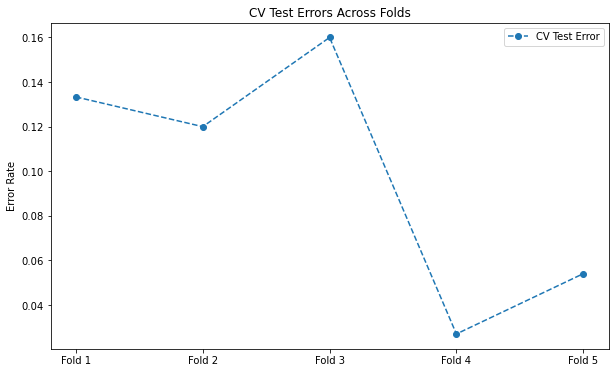

Confusion Matrix:
 [[20  3  2]
 [ 1 60  0]
 [ 5  2 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.78        25
           1       0.92      0.98      0.95        61
           2       0.90      0.73      0.81        26

    accuracy                           0.88       112
   macro avg       0.87      0.84      0.85       112
weighted avg       0.88      0.88      0.88       112



In [7]:


if 'Blood Pressure' in df.columns:
    bp = df['Blood Pressure'].str.split('/', expand=True).astype(float)
    df['systolic_bp'] = bp[0]
    df['diastolic_bp'] = bp[1]
    df.drop('Blood Pressure', axis=1, inplace=True)

# Drop non-feature columns
df.drop(['Person ID'], axis=1, inplace=True)

# Fill remaining missing values
df.fillna(method='ffill', inplace=True)

# Separate features and target
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Evaluate the model on the entire dataset before any split
random_forest_model.fit(X, y)
y_pred_full = random_forest_model.predict(X)
full_data_accuracy = accuracy_score(y, y_pred_full)
print("Accuracy on the full dataset:", full_data_accuracy)

# Train the model on training set and evaluate on the testing set
random_forest_model.fit(X_train, y_train)
y_train_pred = random_forest_model.predict(X_train)
y_test_pred = random_forest_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

# Setup K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(random_forest_model, X, y, cv=kf)

print("K-Fold Cross-validation Accuracy scores for each fold:")
print(cv_scores)
print("\nMean CV Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

# Plotting CV test errors
plt.figure(figsize=(10, 6))
plt.plot(1 - cv_scores, label='CV Test Error', linestyle='--', marker='o')
plt.xticks(range(len(cv_scores)), ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.ylabel('Error Rate')
plt.title('CV Test Errors Across Folds')
plt.legend()
plt.show()

# Evaluate detailed metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


We applied DT and evaulated the accuracy on the full set. then we splitted the data and evaluated the loss on the test and training sets. After that, we applied 5 fold cv and then we evaluated the mean test error across the folds. Finaly we presented the confusion matrix and the detailed classification report for the DT.

Accuracy on the full dataset: 0.9329758713136729
Training Set Accuracy: 0.9362416107382551
Test Set Accuracy: 0.88
K-Fold Cross-validation Accuracy scores for each fold:
[0.88       0.84       0.84       0.95945946 0.94594595]

Mean CV Accuracy: 0.89 (+/- 0.10)


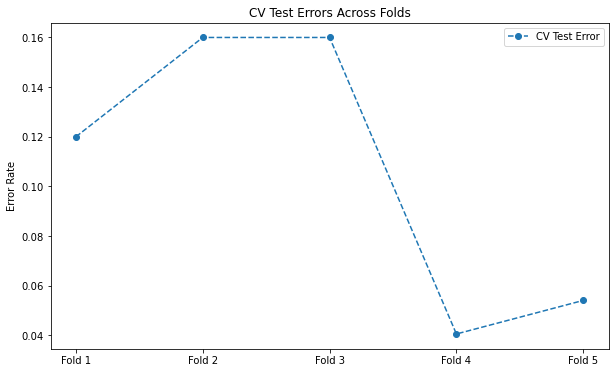

Confusion Matrix:
 [[14  2  2]
 [ 1 40  0]
 [ 3  1 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        18
           1       0.93      0.98      0.95        41
           2       0.86      0.75      0.80        16

    accuracy                           0.88        75
   macro avg       0.86      0.83      0.84        75
weighted avg       0.88      0.88      0.88        75



In [8]:


# Separate the features and the target variable
X = df.drop('Sleep Disorder', axis=1) 
y = df['Sleep Disorder'] 

# Initialize the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Evaluate the model on the entire dataset before any split
decision_tree_model.fit(X, y)
y_pred_full = decision_tree_model.predict(X)
full_data_accuracy = accuracy_score(y, y_pred_full)
print("Accuracy on the full dataset:", full_data_accuracy)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier on the training set and evaluate on the test set
decision_tree_model.fit(X_train, y_train)
y_train_pred = decision_tree_model.predict(X_train)
y_test_pred = decision_tree_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

# Setup K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(decision_tree_model, X, y, cv=kf)

# Output the mean accuracy and the 95% confidence interval of the score estimate
print("K-Fold Cross-validation Accuracy scores for each fold:")
print(cv_scores)
print("\nMean CV Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

# Plotting CV test errors
plt.figure(figsize=(10, 6))
plt.plot(1 - cv_scores, label='CV Test Error', linestyle='--', marker='o')
plt.xticks(range(len(cv_scores)), ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.ylabel('Error Rate')
plt.title('CV Test Errors Across Folds')
plt.legend()
plt.show()
# Evaluate detailed metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


We used RFC to evaluate the feaure importance, then we plotted the cumulative feature importance curve along with 0.95 threshold line to detrmine the most important features. 

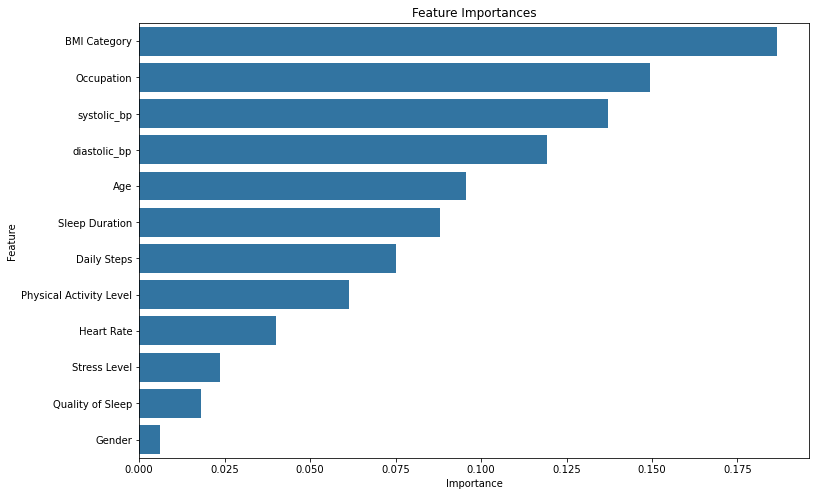

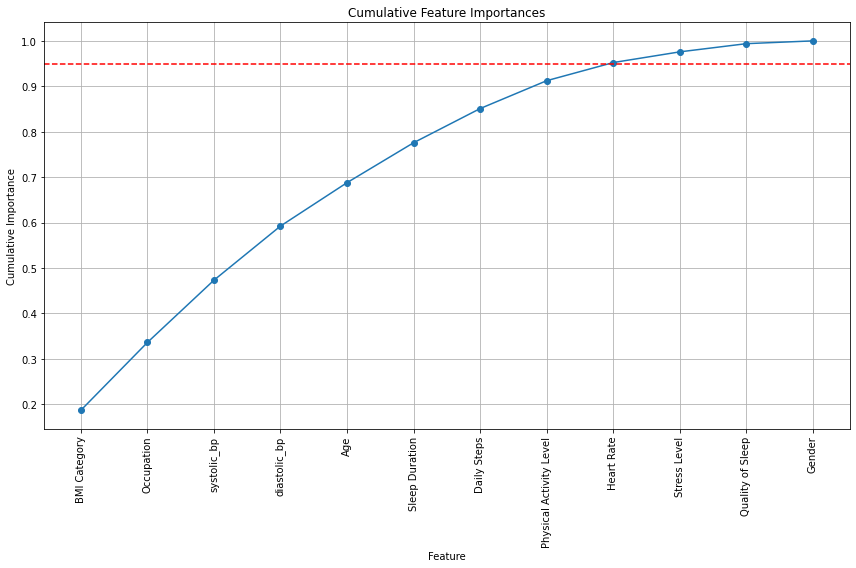

In [9]:
# Prepare the data for the model
X = df[['Gender', 'Occupation', 'BMI Category',
        'Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level',
        'Heart Rate', 'Daily Steps', 'systolic_bp', 'diastolic_bp','Quality of Sleep']]  
y = df['Sleep Disorder']

# Train the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Match feature importances with the column names
features = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the dataframe by importance
features_sorted = features.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_sorted)
plt.title('Feature Importances')
plt.show()

# Calculate cumulative sum of feature importances
features_sorted['cumulative'] = features_sorted['Importance'].cumsum()

# Convert to numpy arrays for plotting
feature_names = np.array(features_sorted['Feature'])
cumulative_importance = np.array(features_sorted['cumulative'])

# Plot cumulative feature importances with feature names on the x-axis
plt.figure(figsize=(12, 8))
plt.plot(feature_names, cumulative_importance, marker='o')
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title('Cumulative Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Cumulative Importance')
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()


We are going to perform a fully-connected neural network execluding the least important features('Quality of sleep', 'Gender', 'Stress Level'). the fcnn is composed of 2 hidden layers first one with 128 nodes and relu activation function, and the second one with 64 nodes with the same activation function . softmax is applied to the output. a confusion matrix and classification report is then provided along with a graph showing the variation of test loss and validation loss vs the # of ephocs . # of epochs is determined using an early stopping function in tensor flow .

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6493 - loss: 1.0214 - val_accuracy: 0.7500 - val_loss: 0.7939
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7422 - loss: 0.7672 - val_accuracy: 0.9500 - val_loss: 0.5804
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8545 - loss: 0.6035 - val_accuracy: 0.9500 - val_loss: 0.4288
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8319 - loss: 0.5237 - val_accuracy: 0.9500 - val_loss: 0.3287
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8636 - loss: 0.4055 - val_accuracy: 0.9500 - val_loss: 0.2706
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8417 - loss: 0.4360 - val_accuracy: 0.9500 - val_loss: 0.2383
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8897 - loss: 0.3534 - val_accuracy: 0.9750 - val_loss: 0.2213
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8726 - loss: 0.3814 - val_accuracy: 0.9750 - val_loss: 0.2228

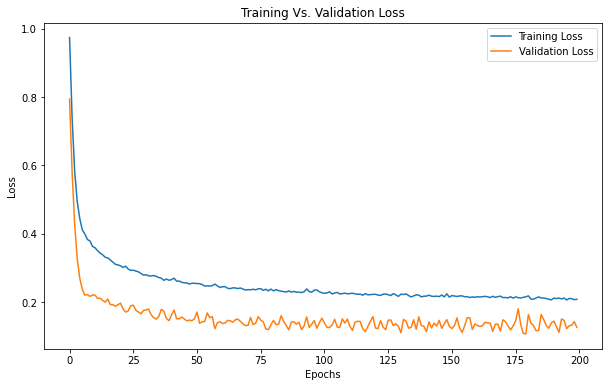

Columns used for model training: ['Age', 'Occupation', 'Sleep Duration', 'Physical Activity Level', 'BMI Category', 'Heart Rate', 'systolic_bp', 'diastolic_bp']
Confusion Matrix:
[[21  3  1]
 [ 1 60  0]
 [ 3  2 21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        25
           1       0.92      0.98      0.95        61
           2       0.95      0.81      0.88        26

    accuracy                           0.91       112
   macro avg       0.91      0.88      0.89       112
weighted avg       0.91      0.91      0.91       112



In [11]:
# Exclude specified columns
X = df[['Age', 'Occupation', 'Sleep Duration', 'Physical Activity Level',
        'BMI Category', 'Heart Rate', 'systolic_bp', 'diastolic_bp']]  # Removed 'Quality of sleep', 'Gender', 'Stress Level'
y = df['Sleep Disorder']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Neural network architecture
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define the input shape explicitly here
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=50)

# Train the model
history = model.fit(X_train, y_train, epochs=200, validation_split=0.15, callbacks=[early_stopping_monitor], verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

# Predictions for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels



# Plotting training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Verify columns used
print("Columns used for model training:", X.columns.tolist())
# Confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

